# t-SNE for Phenotypes & Gene Expression
## _Author(s): Wai Yuen (Wylliam) Cheng_

#### NOTE: Place the data files in the filepath accordingly as specified below

In [31]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from matplotlib.patches import Ellipse
import matplotlib.patches as mpatches
import matplotlib.transforms as transforms
import matplotlib.pyplot as plt
from scipy import stats

In [32]:
## cluster ellipse: https://matplotlib.org/stable/gallery/statistics/confidence_ellipse.html

def plot_ellipse(ax, data, color):
    mean = np.mean(data, axis=0) 
    cov = np.cov(data, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(cov)
    # Sort eigenvalues and eigenvectors
    order = eigenvalues.argsort()[::-1]
    eigenvalues, eigenvectors = eigenvalues[order], eigenvectors[:, order]
    # Calculate angle in degrees
    angle = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1]))
    # Width and height of the ellipse (scaled by sqrt of eigenvalues)
    width, height = 2 * np.sqrt(eigenvalues)
    # Draw the ellipse
    ellipse = Ellipse(xy=mean, width=width, height=height, angle=angle,
                      edgecolor=color, facecolor='none', lw=2)
    ax.add_patch(ellipse)

In [33]:
df_human_gene = pd.read_csv("../BE700_human_expression.(1) (1) (1).csv", sep=",", index_col=0)
df_human_pheno = pd.read_csv("../human_pheno_postprocessed.csv", sep=",", index_col=0)

## Removing columns with missing data for all samples under the 'DM' class
df_human_pheno = df_human_pheno.drop(columns=["2 hour glucose (ogtt):ch1", "fasting glucose (ogtt):ch1"])
df_human_pheno

,age (years):ch1,body mass index (kg/m2):ch1,family history:ch1,fasting glucose (iv0gavg):ch1,fasting insulin (iv0inavg):ch1,gender:ch1,hemoglobin a1c:ch1,si:ch1,waist hip ratio:ch1,diabete_2
GSM624925,39,20,Family history negative,90,2.70,female,5.6,11.91,1.364,0
GSM624926,23,23,Family history negative,87,4.40,male,5.0,8.31,0.792,0
GSM624927,42,21,Family history negative,79,6.10,female,4.6,1.59,0.824,0
GSM624928,40,27,Family history negative,91,5.60,male,5.1,8.38,0.981,0
GSM624929,57,22,Family history negative,94,5.00,female,5.5,4.06,NaN,0
GSM624930,23,25,Family history negative,91,8.00,female,4.3,6.53,0.833,0
GSM624931,46,26,Family history negative,88,4.40,female,5.4,10.39,0.845,0
GSM624932,28,24,Family history negative,83,1.70,male,4.7,14.28,0.865,0
GSM624933,38,25,Family history negative,88,4.60,male,5.1,10.29,0.902,0
GSM624934,50,33,Family history negative,109,15.90,male,5.4,1.70,1.018,0


In [34]:
## Convert SI to log(SI)
df_human_pheno['si:ch1'] = np.log(df_human_pheno['si:ch1'])
df_human_pheno

,age (years):ch1,body mass index (kg/m2):ch1,family history:ch1,fasting glucose (iv0gavg):ch1,fasting insulin (iv0inavg):ch1,gender:ch1,hemoglobin a1c:ch1,si:ch1,waist hip ratio:ch1,diabete_2
GSM624925,39,20,Family history negative,90,2.70,female,5.6,2.477378,1.364,0
GSM624926,23,23,Family history negative,87,4.40,male,5.0,2.117460,0.792,0
GSM624927,42,21,Family history negative,79,6.10,female,4.6,0.463734,0.824,0
GSM624928,40,27,Family history negative,91,5.60,male,5.1,2.125848,0.981,0
GSM624929,57,22,Family history negative,94,5.00,female,5.5,1.401183,NaN,0
GSM624930,23,25,Family history negative,91,8.00,female,4.3,1.876407,0.833,0
GSM624931,46,26,Family history negative,88,4.40,female,5.4,2.340844,0.845,0
GSM624932,28,24,Family history negative,83,1.70,male,4.7,2.658860,0.865,0
GSM624933,38,25,Family history negative,88,4.60,male,5.1,2.331173,0.902,0
GSM624934,50,33,Family history negative,109,15.90,male,5.4,0.530628,1.018,0


#### Data Imputation

In [35]:
from sklearn.impute import KNNImputer
nan = np.nan
X = np.array(df_human_pheno['si:ch1']).reshape(-1, 1)
imputer = KNNImputer(n_neighbors=5, weights="uniform")
df_human_pheno['si:ch1'] = imputer.fit_transform(X)
X = np.array(df_human_pheno['waist hip ratio:ch1']).reshape(-1, 1)
imputer = KNNImputer(n_neighbors=5, weights="uniform")
df_human_pheno['waist hip ratio:ch1'] = imputer.fit_transform(X)

df_human_pheno

,age (years):ch1,body mass index (kg/m2):ch1,family history:ch1,fasting glucose (iv0gavg):ch1,fasting insulin (iv0inavg):ch1,gender:ch1,hemoglobin a1c:ch1,si:ch1,waist hip ratio:ch1,diabete_2
GSM624925,39,20,Family history negative,90,2.70,female,5.6,2.477378,1.364000,0
GSM624926,23,23,Family history negative,87,4.40,male,5.0,2.117460,0.792000,0
GSM624927,42,21,Family history negative,79,6.10,female,4.6,0.463734,0.824000,0
GSM624928,40,27,Family history negative,91,5.60,male,5.1,2.125848,0.981000,0
GSM624929,57,22,Family history negative,94,5.00,female,5.5,1.401183,0.889735,0
GSM624930,23,25,Family history negative,91,8.00,female,4.3,1.876407,0.833000,0
GSM624931,46,26,Family history negative,88,4.40,female,5.4,2.340844,0.845000,0
GSM624932,28,24,Family history negative,83,1.70,male,4.7,2.658860,0.865000,0
GSM624933,38,25,Family history negative,88,4.60,male,5.1,2.331173,0.902000,0
GSM624934,50,33,Family history negative,109,15.90,male,5.4,0.530628,1.018000,0


***

## Concatenate Class / Cluster Label to Gene

In [36]:
df_classified_gene = df_human_gene.T.assign(diabete_2=list(df_human_pheno["diabete_2"]))
df_classified_gene

,NaN,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A4GALT,A4GNT,...,ZXDA,ZXDB,ZXDB///ZXDA,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,diabete_2
GSM624925,8.471675,6.826548,6.841722,9.203944,12.070644,10.291976,8.722733,9.391888,7.968091,9.700786,...,10.392317,9.519565,8.161837,10.458022,6.938991,14.932713,11.483651,8.699052,10.999399,0
GSM624926,8.454916,7.133399,6.892391,7.152580,12.384987,10.652038,6.916573,10.004361,7.910493,10.268074,...,10.693748,9.744577,8.060379,10.367772,4.857981,15.712538,10.494377,8.372430,11.046991,0
GSM624927,8.556889,6.812498,7.330917,7.967381,12.021358,10.684135,9.108236,9.114783,5.733354,9.715447,...,10.723490,9.901634,8.665753,10.272492,5.436295,15.286579,11.120819,7.827184,11.193368,0
GSM624928,8.494256,7.022368,7.744834,8.668846,12.076220,10.653741,9.163661,9.479376,8.090642,9.434837,...,10.365010,9.413637,8.608526,10.294129,5.904484,15.574047,11.202640,9.100925,11.196311,0
GSM624929,8.532161,8.620220,6.035624,9.281442,12.111531,10.922733,9.048243,9.872059,5.201634,9.613053,...,10.824243,9.881409,8.162768,10.547895,8.192786,14.932519,11.090102,8.462298,11.561014,0
GSM624930,8.670656,6.831624,7.029011,8.735617,11.928383,10.582612,7.823916,9.298521,9.378512,9.301725,...,10.658658,8.269888,9.074226,10.772724,6.605850,15.298123,10.709364,7.874059,11.333701,0
GSM624931,8.480992,4.364572,5.675251,8.116074,12.246184,10.702692,9.738817,8.601028,9.316282,9.561479,...,10.542935,8.478639,8.197722,10.394143,4.887525,15.049772,10.530310,9.045760,11.441655,0
GSM624932,8.572890,9.176423,6.675251,8.624294,11.657184,10.752381,8.885125,8.127221,6.159871,8.429616,...,10.839912,8.280631,8.371494,10.488997,6.632268,15.205690,10.714498,9.044121,11.491251,0
GSM624933,8.705287,7.197708,6.898450,9.202751,12.274542,10.785289,9.047942,9.084543,8.151778,9.880808,...,10.519931,9.127255,8.528291,10.128301,6.112700,15.178727,11.474636,8.232661,10.975295,0
GSM624934,8.578561,4.877744,7.646019,8.558300,12.071838,10.586465,9.113890,9.268893,8.586465,9.316282,...,10.747773,9.774830,8.462205,10.467235,7.073606,15.420862,10.546667,8.342519,11.608255,0


### Extract top 100/1000 genes

In [37]:
top_100_classified_gene = list(pd.read_csv("welch_t_test_results_to_d2.csv", index_col=0).head(100).index)
top_1000_classified_gene = list(pd.read_csv("welch_t_test_results_to_d2.csv", index_col=0).head(1000).index)

### t-SNE on diabete_2

In [38]:
scaling = StandardScaler()

df_tsne_human_gene = scaling.fit_transform(np.array(df_human_gene).T)
pd.DataFrame(df_tsne_human_gene)

tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
gene_tsne = tsne.fit_transform(df_tsne_human_gene)

print(gene_tsne)

[[ 4.8038650e+00 -1.5414121e+00]
 [ 6.2680869e+00 -4.9017468e-01]
 [ 5.8073521e+00 -1.0694439e+00]
 [ 5.1837592e+00 -1.2730962e+00]
 [ 4.8044248e+00 -1.6463453e+00]
 [ 6.6345801e+00 -2.0713062e+00]
 [ 6.1638303e+00 -1.9253348e+00]
 [ 5.7563128e+00 -2.7815609e+00]
 [ 5.0657244e+00 -5.7331795e-01]
 [ 5.9590273e+00 -1.7200665e+00]
 [ 4.4550443e+00 -7.4431929e-03]
 [ 5.9474320e+00 -2.2447314e+00]
 [ 5.6657877e+00  7.0729285e-01]
 [ 5.1735039e+00 -3.9673421e+00]
 [ 6.1937771e+00 -2.5084174e+00]
 [ 6.7216787e+00 -3.0921502e+00]
 [ 5.3935962e+00 -9.6527028e-01]
 [ 5.4119506e+00 -1.0995603e+00]
 [ 5.5850186e+00 -1.0991281e+00]
 [ 5.6870775e+00  8.5820131e-02]
 [ 5.0613112e+00 -2.0308859e+00]
 [ 5.1211801e+00 -3.8437817e+00]
 [ 5.7723446e+00 -3.8837671e-01]
 [ 4.4129186e+00 -7.0393300e-01]
 [ 4.7066293e+00 -2.2301900e+00]
 [ 6.2674274e+00 -7.2186244e-01]
 [ 6.7293262e+00 -2.7491462e+00]
 [ 5.7674041e+00 -2.0856097e+00]
 [ 5.0657773e+00 -1.7972175e+00]
 [ 5.1827245e+00 -9.5063031e-01]
 [ 7.45661

/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Text(0, 0.5, 'TSNE2')

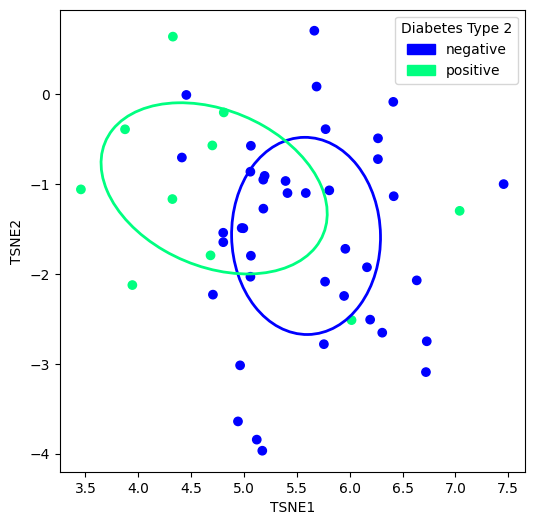

In [39]:
plt.figure(figsize=(6,6))
scatter = plt.scatter(gene_tsne[:,0],gene_tsne[:,1],c=df_classified_gene['diabete_2'],cmap='winter')
unique_classes = df_classified_gene['diabete_2'].unique()
colors = [scatter.cmap(scatter.norm(value)) for value in unique_classes]
legend_patches = [
    mpatches.Patch(color=colors[i], label="positive" if unique_classes[i] == 1 else "negative")
    for i in range(len(unique_classes))
]
ax = plt.gca()
for i, cls in enumerate(unique_classes):
    cluster_data = gene_tsne[df_classified_gene['diabete_2'] == cls]
    plot_ellipse(ax, cluster_data, colors[i])

plt.legend(handles=legend_patches, title="Diabetes Type 2", loc="best")
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')

In [40]:
scaling = StandardScaler()

df_tsne_human_gene = scaling.fit_transform(np.array(df_human_gene).T)
pd.DataFrame(df_tsne_human_gene)

tsne = TSNE(n_components=3, perplexity=30, n_iter=1000, random_state=42)
gene_tsne = tsne.fit_transform(df_tsne_human_gene)

gene_tsne_df = pd.DataFrame(gene_tsne, columns=['TSNE1', 'TSNE2', 'TSNE3'])

print(gene_tsne)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[[  16.617949    62.876118   -39.15646  ]
 [ -21.59979      8.099772   -70.117905 ]
 [-109.237915   -61.413406    -1.1661543]
 [ -64.3022      31.641237   -30.44834  ]
 [-112.87372    -16.51755     78.73715  ]
 [ -51.24126    105.238266   -66.23878  ]
 [  85.88452     40.497112   -23.986586 ]
 [ 124.822784   -48.32405     61.91721  ]
 [ -48.934658  -145.5861     -84.132454 ]
 [  48.177044   110.65391     73.24766  ]
 [ -63.529373   130.4267      48.990913 ]
 [ -76.65679     39.646572   -96.81321  ]
 [ -27.692627    78.25093     13.01544  ]
 [  95.12413     37.805183   109.558685 ]
 [  54.038868   -78.42459    -19.02107  ]
 [  88.41153     62.629227   -94.433205 ]
 [-126.57717      1.5980248    6.3049293]
 [  -7.8361106   -6.677329    25.293694 ]
 [ -42.21616    -49.294937   104.0089   ]
 [ -79.2108    -119.24335     44.56223  ]
 [ 125.00506    -62.40375    -21.091892 ]
 [ -27.942781    -2.780863  -150.12029  ]
 [ -91.07595     55.979004    90.244484 ]
 [  65.048775   -78.27054    -97.4

/var/folders/j9/4hvlltj95999sl1bmvdvgv7c0000gn/T/ipykernel_45914/1430861064.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


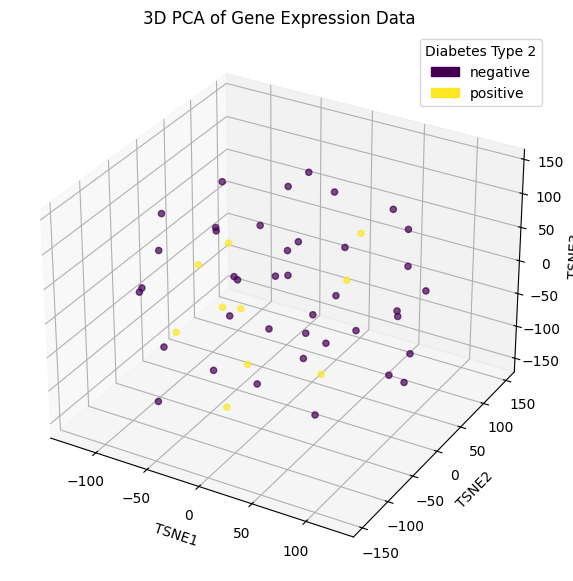

In [41]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(gene_tsne_df['TSNE1'], gene_tsne_df['TSNE2'], gene_tsne_df['TSNE3'], c=df_classified_gene['diabete_2'], alpha=0.7)
unique_classes = df_classified_gene['diabete_2'].unique()
colors = [scatter.cmap(scatter.norm(value)) for value in unique_classes]
legend_patches = [
    mpatches.Patch(color=colors[i], label="positive" if unique_classes[i] == 1 else "negative")
    for i in range(len(unique_classes))
]

ax.legend(handles=legend_patches, title="Diabetes Type 2", loc="best")
# Add labels and titles
ax.set_title('3D PCA of Gene Expression Data')
ax.set_xlabel('TSNE1')
ax.set_ylabel('TSNE2')
ax.set_zlabel('TSNE3')

fig.show()

### PCA (top 100 genes)

In [42]:
scaling = StandardScaler()

df_tsne_human_gene = scaling.fit_transform(df_human_gene.loc[top_100_classified_gene].T)
pd.DataFrame(df_tsne_human_gene)

tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
gene_tsne = tsne.fit_transform(df_tsne_human_gene)

print(gene_tsne)

[[ 2.4376333  -1.1492977 ]
 [ 2.776023   -2.3026028 ]
 [ 3.2579067  -1.9260299 ]
 [ 2.8455482  -0.9243943 ]
 [ 3.3824844  -1.751376  ]
 [ 0.98544884 -1.500905  ]
 [ 2.6209564  -1.8346765 ]
 [ 1.9620106  -2.0957007 ]
 [ 3.3189104  -0.48286638]
 [ 2.916577   -2.1436372 ]
 [ 2.0331976   0.30087683]
 [ 2.4679458  -1.6742986 ]
 [ 2.749569   -2.8139246 ]
 [ 1.2649951  -3.1631656 ]
 [ 1.2995534  -1.9941113 ]
 [ 2.0456228  -2.7408545 ]
 [ 2.2703862  -0.43714234]
 [ 2.2671545  -0.7856875 ]
 [ 2.4110754  -0.17415349]
 [ 3.8781407  -1.0827826 ]
 [ 2.2518141  -1.3897269 ]
 [ 1.6872822  -2.932796  ]
 [ 3.2861156  -1.1233902 ]
 [ 3.0417135  -0.31232873]
 [ 1.6323012  -1.0604676 ]
 [ 1.0789827  -0.16745614]
 [ 1.9504051  -1.9442953 ]
 [ 2.147708   -1.4471416 ]
 [ 2.3678985  -1.3264977 ]
 [ 2.6769705  -1.4232123 ]
 [ 4.180371   -0.27717605]
 [ 2.2591352  -0.73883593]
 [ 3.6420228  -2.6564693 ]
 [ 2.129998   -1.103287  ]
 [ 3.080183   -0.80547684]
 [ 1.060548   -0.8768506 ]
 [ 2.9296448   0.8280186 ]
 

/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Text(0, 0.5, 'TSNE2')

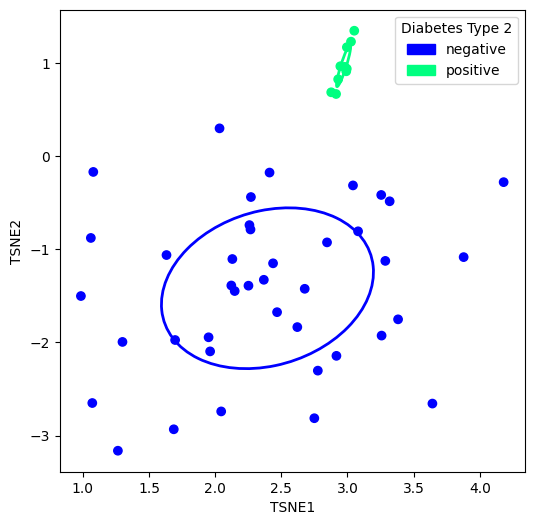

In [43]:
plt.figure(figsize=(6,6))
scatter = plt.scatter(gene_tsne[:,0],gene_tsne[:,1],c=df_classified_gene['diabete_2'],cmap='winter')
unique_classes = df_classified_gene['diabete_2'].unique()
colors = [scatter.cmap(scatter.norm(value)) for value in unique_classes]
legend_patches = [
    mpatches.Patch(color=colors[i], label="positive" if unique_classes[i] == 1 else "negative")
    for i in range(len(unique_classes))
]
ax = plt.gca()
for i, cls in enumerate(unique_classes):
    cluster_data = gene_tsne[df_classified_gene['diabete_2'] == cls]
    plot_ellipse(ax, cluster_data, colors[i])

plt.legend(handles=legend_patches, title="Diabetes Type 2", loc="best")
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')

In [44]:
scaling = StandardScaler()

df_tsne_human_gene = scaling.fit_transform(df_human_gene.loc[top_100_classified_gene].T)
pd.DataFrame(df_tsne_human_gene)

tsne = TSNE(n_components=3, perplexity=30, n_iter=1000, random_state=42)
gene_tsne = tsne.fit_transform(df_tsne_human_gene)

gene_tsne_df = pd.DataFrame(gene_tsne, columns=['TSNE1', 'TSNE2', 'TSNE3'])

print(gene_tsne)

[[  47.10933     -34.18593     -42.776955  ]
 [  10.300508    -70.75788       0.30820456]
 [  28.455427     29.262175     29.914198  ]
 [-115.39227     -61.585022     21.746244  ]
 [ 109.66708     -75.76234      -0.3285513 ]
 [  56.421238    -33.581116     40.82371   ]
 [ -25.176321     56.41902       0.4971879 ]
 [ -60.60271     -25.23692      -8.000408  ]
 [-147.56918      49.675743     47.628326  ]
 [   3.4373596    -8.177897    -13.607525  ]
 [ 122.75125      -6.414681     68.498116  ]
 [ -58.978638    -47.63634      47.09477   ]
 [  54.607304   -128.00957      -4.0054827 ]
 [ -77.63688      25.736357   -121.69217   ]
 [ -96.69953      31.774128      3.0572112 ]
 [ -72.8778      116.39431       8.439068  ]
 [ -63.71522     -98.12626     -10.423218  ]
 [ -23.256466     44.302635    111.78222   ]
 [  17.42865      36.089657    -57.850086  ]
 [  74.91874      46.213844    110.02027   ]
 [  72.686584     66.45013      30.76111   ]
 [ -79.03891     -57.06086    -121.13475   ]
 [ 128.714

/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


/var/folders/j9/4hvlltj95999sl1bmvdvgv7c0000gn/T/ipykernel_45914/1430861064.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


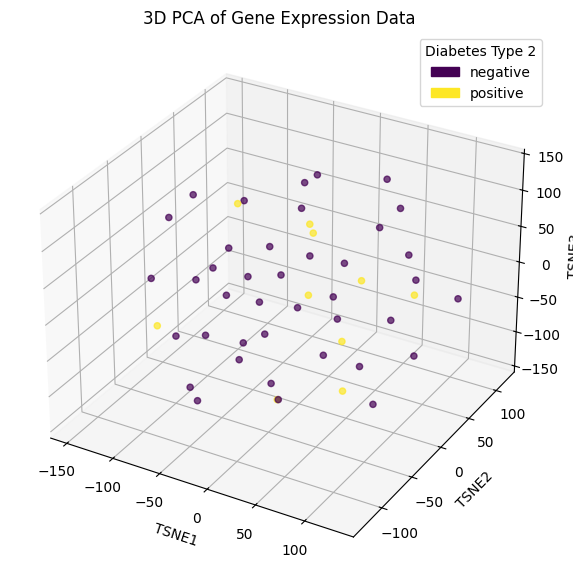

In [45]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(gene_tsne_df['TSNE1'], gene_tsne_df['TSNE2'], gene_tsne_df['TSNE3'], c=df_classified_gene['diabete_2'], alpha=0.7)
unique_classes = df_classified_gene['diabete_2'].unique()
colors = [scatter.cmap(scatter.norm(value)) for value in unique_classes]
legend_patches = [
    mpatches.Patch(color=colors[i], label="positive" if unique_classes[i] == 1 else "negative")
    for i in range(len(unique_classes))
]

ax.legend(handles=legend_patches, title="Diabetes Type 2", loc="best")
# Add labels and titles
ax.set_title('3D PCA of Gene Expression Data')
ax.set_xlabel('TSNE1')
ax.set_ylabel('TSNE2')
ax.set_zlabel('TSNE3')

fig.show()

### PCA (top 1000 genes)

In [46]:
scaling = StandardScaler()

df_tsne_human_gene = scaling.fit_transform(df_human_gene.loc[top_1000_classified_gene].T)
pd.DataFrame(df_tsne_human_gene)

tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
gene_tsne = tsne.fit_transform(df_tsne_human_gene)

print(gene_tsne)

[[ 1.6643449e+00  3.9705798e-02]
 [ 3.2079375e-01  1.3244610e-01]
 [ 7.2002918e-01  3.6920893e-01]
 [ 1.2774426e+00  2.1785045e-01]
 [ 2.0250218e+00  8.3330446e-01]
 [-2.2963617e-02  1.5582156e+00]
 [ 5.9106958e-01  1.0994170e+00]
 [ 1.0141771e+00  1.2776071e+00]
 [ 1.3201398e+00 -6.9801909e-01]
 [ 8.1435490e-01  8.8297164e-01]
 [ 1.4536450e+00 -1.4564897e+00]
 [ 9.1491473e-01  1.3349929e+00]
 [-5.9433466e-01  6.1076355e-01]
 [ 1.2960594e+00  3.0430982e+00]
 [ 7.4984360e-01  1.7537690e+00]
 [ 3.4582430e-01  2.3568904e+00]
 [ 2.2517560e+00 -1.3633914e-02]
 [ 1.6603384e+00  3.1929207e-01]
 [ 1.7457595e+00 -2.7372157e-02]
 [ 1.5903120e-01 -7.5250810e-01]
 [ 1.4522487e+00  1.1206750e+00]
 [ 1.4525990e+00  2.8643045e+00]
 [ 4.3912825e-01 -2.3569413e-01]
 [ 1.2432075e+00 -8.1121594e-01]
 [ 2.0545154e+00  1.2965453e+00]
 [ 2.9546776e+00 -3.4209737e-04]
 [ 4.3989357e-01  1.9592811e+00]
 [ 1.1681153e+00  7.9941523e-01]
 [ 1.7881250e+00  5.9553295e-01]
 [ 1.8476893e+00  3.3618873e-01]
 [ 3.22606

/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Text(0, 0.5, 'TSNE2')

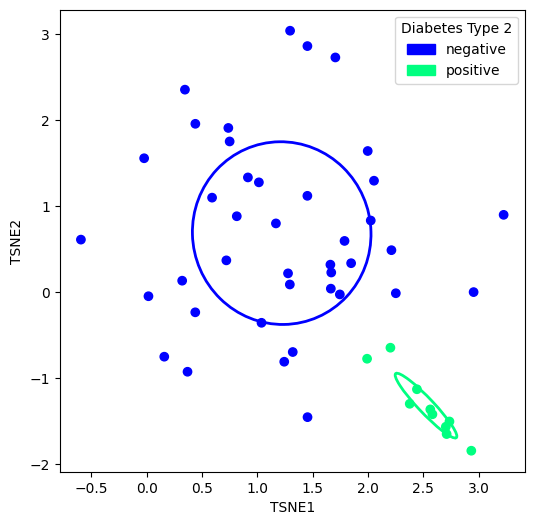

In [47]:
plt.figure(figsize=(6,6))
scatter = plt.scatter(gene_tsne[:,0],gene_tsne[:,1],c=df_classified_gene['diabete_2'],cmap='winter')
unique_classes = df_classified_gene['diabete_2'].unique()
colors = [scatter.cmap(scatter.norm(value)) for value in unique_classes]
legend_patches = [
    mpatches.Patch(color=colors[i], label="positive" if unique_classes[i] == 1 else "negative")
    for i in range(len(unique_classes))
]
ax = plt.gca()
for i, cls in enumerate(unique_classes):
    cluster_data = gene_tsne[df_classified_gene['diabete_2'] == cls]
    plot_ellipse(ax, cluster_data, colors[i])


plt.legend(handles=legend_patches, title="Diabetes Type 2", loc="best")
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')

In [48]:
scaling = StandardScaler()

df_tsne_human_gene = scaling.fit_transform(df_human_gene.loc[top_100_classified_gene].T)
pd.DataFrame(df_tsne_human_gene)

tsne = TSNE(n_components=3, perplexity=30, n_iter=1000, random_state=42)
gene_tsne = tsne.fit_transform(df_tsne_human_gene)

gene_tsne_df = pd.DataFrame(gene_tsne, columns=['TSNE1', 'TSNE2', 'TSNE3'])

print(gene_tsne)

[[  47.10933     -34.18593     -42.776955  ]
 [  10.300508    -70.75788       0.30820456]
 [  28.455427     29.262175     29.914198  ]
 [-115.39227     -61.585022     21.746244  ]
 [ 109.66708     -75.76234      -0.3285513 ]
 [  56.421238    -33.581116     40.82371   ]
 [ -25.176321     56.41902       0.4971879 ]
 [ -60.60271     -25.23692      -8.000408  ]
 [-147.56918      49.675743     47.628326  ]
 [   3.4373596    -8.177897    -13.607525  ]
 [ 122.75125      -6.414681     68.498116  ]
 [ -58.978638    -47.63634      47.09477   ]
 [  54.607304   -128.00957      -4.0054827 ]
 [ -77.63688      25.736357   -121.69217   ]
 [ -96.69953      31.774128      3.0572112 ]
 [ -72.8778      116.39431       8.439068  ]
 [ -63.71522     -98.12626     -10.423218  ]
 [ -23.256466     44.302635    111.78222   ]
 [  17.42865      36.089657    -57.850086  ]
 [  74.91874      46.213844    110.02027   ]
 [  72.686584     66.45013      30.76111   ]
 [ -79.03891     -57.06086    -121.13475   ]
 [ 128.714

/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


/var/folders/j9/4hvlltj95999sl1bmvdvgv7c0000gn/T/ipykernel_45914/1430861064.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


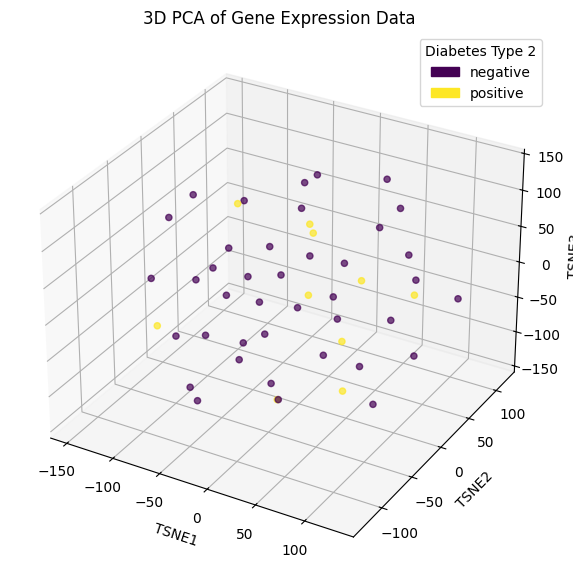

In [49]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(gene_tsne_df['TSNE1'], gene_tsne_df['TSNE2'], gene_tsne_df['TSNE3'], c=df_classified_gene['diabete_2'], alpha=0.7)
unique_classes = df_classified_gene['diabete_2'].unique()
colors = [scatter.cmap(scatter.norm(value)) for value in unique_classes]
legend_patches = [
    mpatches.Patch(color=colors[i], label="positive" if unique_classes[i] == 1 else "negative")
    for i in range(len(unique_classes))
]

ax.legend(handles=legend_patches, title="Diabetes Type 2", loc="best")
# Add labels and titles
ax.set_title('3D PCA of Gene Expression Data')
ax.set_xlabel('TSNE1')
ax.set_ylabel('TSNE2')
ax.set_zlabel('TSNE3')

fig.show()

***

### ANOVA (using A1C)
Cases:
1. A1C < 5.7% Normal
2. 5.7% <= A1C <= 6.4% Prediabetes
3. A1C > 6.5% Diabetes

In [50]:
## 0: Normal
## 1: Prediabetes
## 2: Diabetes

df_classified_gene = df_human_gene.T.assign(
    A1C_Class=list(df_human_pheno.apply(
        lambda x: 0 if x["hemoglobin a1c:ch1"] < 5.7 else 1 if x["hemoglobin a1c:ch1"] < 6.4 else 2,
        axis=1
    ))
)
df_classified_gene

,NaN,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A4GALT,A4GNT,...,ZXDA,ZXDB,ZXDB///ZXDA,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,A1C_Class
GSM624925,8.471675,6.826548,6.841722,9.203944,12.070644,10.291976,8.722733,9.391888,7.968091,9.700786,...,10.392317,9.519565,8.161837,10.458022,6.938991,14.932713,11.483651,8.699052,10.999399,0
GSM624926,8.454916,7.133399,6.892391,7.152580,12.384987,10.652038,6.916573,10.004361,7.910493,10.268074,...,10.693748,9.744577,8.060379,10.367772,4.857981,15.712538,10.494377,8.372430,11.046991,0
GSM624927,8.556889,6.812498,7.330917,7.967381,12.021358,10.684135,9.108236,9.114783,5.733354,9.715447,...,10.723490,9.901634,8.665753,10.272492,5.436295,15.286579,11.120819,7.827184,11.193368,0
GSM624928,8.494256,7.022368,7.744834,8.668846,12.076220,10.653741,9.163661,9.479376,8.090642,9.434837,...,10.365010,9.413637,8.608526,10.294129,5.904484,15.574047,11.202640,9.100925,11.196311,0
GSM624929,8.532161,8.620220,6.035624,9.281442,12.111531,10.922733,9.048243,9.872059,5.201634,9.613053,...,10.824243,9.881409,8.162768,10.547895,8.192786,14.932519,11.090102,8.462298,11.561014,0
GSM624930,8.670656,6.831624,7.029011,8.735617,11.928383,10.582612,7.823916,9.298521,9.378512,9.301725,...,10.658658,8.269888,9.074226,10.772724,6.605850,15.298123,10.709364,7.874059,11.333701,0
GSM624931,8.480992,4.364572,5.675251,8.116074,12.246184,10.702692,9.738817,8.601028,9.316282,9.561479,...,10.542935,8.478639,8.197722,10.394143,4.887525,15.049772,10.530310,9.045760,11.441655,0
GSM624932,8.572890,9.176423,6.675251,8.624294,11.657184,10.752381,8.885125,8.127221,6.159871,8.429616,...,10.839912,8.280631,8.371494,10.488997,6.632268,15.205690,10.714498,9.044121,11.491251,0
GSM624933,8.705287,7.197708,6.898450,9.202751,12.274542,10.785289,9.047942,9.084543,8.151778,9.880808,...,10.519931,9.127255,8.528291,10.128301,6.112700,15.178727,11.474636,8.232661,10.975295,0
GSM624934,8.578561,4.877744,7.646019,8.558300,12.071838,10.586465,9.113890,9.268893,8.586465,9.316282,...,10.747773,9.774830,8.462205,10.467235,7.073606,15.420862,10.546667,8.342519,11.608255,0


In [51]:
grouped = df_classified_gene.groupby('A1C_Class')

group_0 = grouped.get_group(0).drop('A1C_Class', axis=1)
group_1 = grouped.get_group(1).drop('A1C_Class', axis=1)
group_2 = grouped.get_group(2).drop('A1C_Class', axis=1)

results = {}
for gene in group_0.columns:
    # Perform one-way ANOVA
    f_stat, p_val = stats.f_oneway(group_0[gene], group_1[gene], group_2[gene])
    results[gene] = {'f_stat': f_stat, 'p_val': p_val}

results_df_classified_gene = pd.DataFrame(results).T
results_df_classified_gene.sort_values('p_val', inplace=True)

# Save results to CSV
results_df_classified_gene.to_csv("anova_results_to_d2_A1C.csv")

### Extract top 100/1000 genes

In [52]:
top_100_classified_gene = list(pd.read_csv("anova_results_to_d2_A1C.csv", index_col=0).head(100).index)
top_1000_classified_gene = list(pd.read_csv("anova_results_to_d2_A1C.csv", index_col=0).head(1000).index)

### PCA (Raw Data) (A1C CDC Classes)

In [53]:
scaling = StandardScaler()

df_tsne_human_gene = scaling.fit_transform(np.array(df_human_gene).T)
pd.DataFrame(df_tsne_human_gene)

tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
gene_tsne = tsne.fit_transform(df_tsne_human_gene)

print(gene_tsne)

[[ 4.8038650e+00 -1.5414121e+00]
 [ 6.2680869e+00 -4.9017468e-01]
 [ 5.8073521e+00 -1.0694439e+00]
 [ 5.1837592e+00 -1.2730962e+00]
 [ 4.8044248e+00 -1.6463453e+00]
 [ 6.6345801e+00 -2.0713062e+00]
 [ 6.1638303e+00 -1.9253348e+00]
 [ 5.7563128e+00 -2.7815609e+00]
 [ 5.0657244e+00 -5.7331795e-01]
 [ 5.9590273e+00 -1.7200665e+00]
 [ 4.4550443e+00 -7.4431929e-03]
 [ 5.9474320e+00 -2.2447314e+00]
 [ 5.6657877e+00  7.0729285e-01]
 [ 5.1735039e+00 -3.9673421e+00]
 [ 6.1937771e+00 -2.5084174e+00]
 [ 6.7216787e+00 -3.0921502e+00]
 [ 5.3935962e+00 -9.6527028e-01]
 [ 5.4119506e+00 -1.0995603e+00]
 [ 5.5850186e+00 -1.0991281e+00]
 [ 5.6870775e+00  8.5820131e-02]
 [ 5.0613112e+00 -2.0308859e+00]
 [ 5.1211801e+00 -3.8437817e+00]
 [ 5.7723446e+00 -3.8837671e-01]
 [ 4.4129186e+00 -7.0393300e-01]
 [ 4.7066293e+00 -2.2301900e+00]
 [ 6.2674274e+00 -7.2186244e-01]
 [ 6.7293262e+00 -2.7491462e+00]
 [ 5.7674041e+00 -2.0856097e+00]
 [ 5.0657773e+00 -1.7972175e+00]
 [ 5.1827245e+00 -9.5063031e-01]
 [ 7.45661

/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Text(0, 0.5, 'TSNE2')

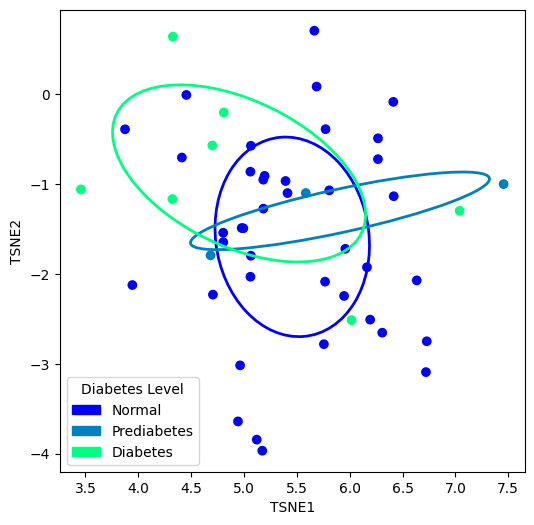

In [54]:
plt.figure(figsize=(6,6))
scatter = plt.scatter(gene_tsne[:,0],gene_tsne[:,1],c=df_classified_gene['A1C_Class'],cmap='winter')
unique_classes = df_classified_gene['A1C_Class'].unique()
colors = [scatter.cmap(scatter.norm(value)) for value in unique_classes]
legend_patches = [
    mpatches.Patch(color=colors[i], label="Normal" if unique_classes[i] == 0 else "Prediabetes" if unique_classes[i] == 1 else "Diabetes")
    for i in range(len(unique_classes))
]
ax = plt.gca()
for i, cls in enumerate(unique_classes):
    cluster_data = gene_tsne[df_classified_gene['A1C_Class'] == cls]
    plot_ellipse(ax, cluster_data, colors[i])

plt.legend(handles=legend_patches, title="Diabetes Level", loc="best")
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')

In [56]:
scaling = StandardScaler()

df_tsne_human_gene = scaling.fit_transform(np.array(df_human_gene).T)
pd.DataFrame(df_tsne_human_gene)

tsne = TSNE(n_components=3, perplexity=30, n_iter=1000, random_state=42)
gene_tsne = tsne.fit_transform(df_tsne_human_gene)

gene_tsne_df = pd.DataFrame(gene_tsne, columns=['TSNE1', 'TSNE2', 'TSNE3'])

print(gene_tsne)

[[  16.617949    62.876118   -39.15646  ]
 [ -21.59979      8.099772   -70.117905 ]
 [-109.237915   -61.413406    -1.1661543]
 [ -64.3022      31.641237   -30.44834  ]
 [-112.87372    -16.51755     78.73715  ]
 [ -51.24126    105.238266   -66.23878  ]
 [  85.88452     40.497112   -23.986586 ]
 [ 124.822784   -48.32405     61.91721  ]
 [ -48.934658  -145.5861     -84.132454 ]
 [  48.177044   110.65391     73.24766  ]
 [ -63.529373   130.4267      48.990913 ]
 [ -76.65679     39.646572   -96.81321  ]
 [ -27.692627    78.25093     13.01544  ]
 [  95.12413     37.805183   109.558685 ]
 [  54.038868   -78.42459    -19.02107  ]
 [  88.41153     62.629227   -94.433205 ]
 [-126.57717      1.5980248    6.3049293]
 [  -7.8361106   -6.677329    25.293694 ]
 [ -42.21616    -49.294937   104.0089   ]
 [ -79.2108    -119.24335     44.56223  ]
 [ 125.00506    -62.40375    -21.091892 ]
 [ -27.942781    -2.780863  -150.12029  ]
 [ -91.07595     55.979004    90.244484 ]
 [  65.048775   -78.27054    -97.4

/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


/var/folders/j9/4hvlltj95999sl1bmvdvgv7c0000gn/T/ipykernel_45914/1918027993.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


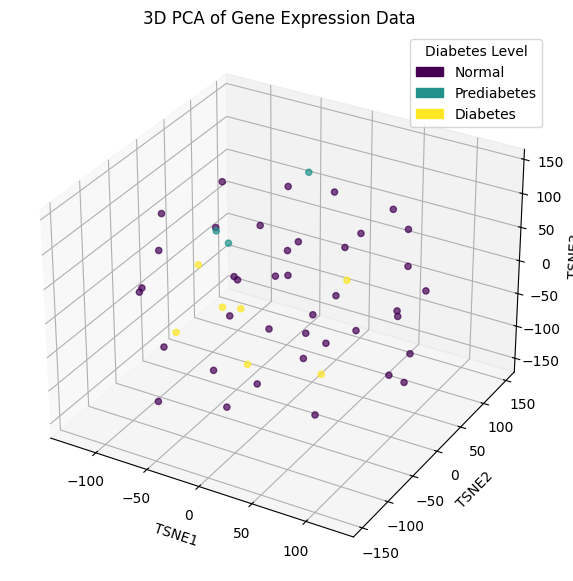

In [57]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(gene_tsne_df['TSNE1'], gene_tsne_df['TSNE2'], gene_tsne_df['TSNE3'], c=df_classified_gene['A1C_Class'], alpha=0.7)
unique_classes = df_classified_gene['A1C_Class'].unique()
colors = [scatter.cmap(scatter.norm(value)) for value in unique_classes]
legend_patches = [
    mpatches.Patch(color=colors[i], label="Normal" if unique_classes[i] == 0 else "Prediabetes" if unique_classes[i] == 1 else "Diabetes")
    for i in range(len(unique_classes))
]

ax.legend(handles=legend_patches, title="Diabetes Level", loc="best")
# Add labels and titles
ax.set_title('3D PCA of Gene Expression Data')
ax.set_xlabel('TSNE1')
ax.set_ylabel('TSNE2')
ax.set_zlabel('TSNE3')

fig.show()

### PCA (top 100 genes)

In [58]:
scaling = StandardScaler()

df_tsne_human_gene = scaling.fit_transform(df_human_gene.loc[top_100_classified_gene].T)
pd.DataFrame(df_tsne_human_gene)

tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
gene_tsne = tsne.fit_transform(df_tsne_human_gene)

print(gene_tsne)

[[ 1.0569975   7.1683397 ]
 [ 1.6484511   6.098312  ]
 [ 0.99015754  7.0260234 ]
 [ 1.0743393   7.1638317 ]
 [ 0.6799812   7.5697045 ]
 [ 1.6604182   7.0946503 ]
 [ 1.5430266   7.8010807 ]
 [ 0.70652944  8.493569  ]
 [-0.01316061  7.16126   ]
 [ 1.5356959   7.537811  ]
 [ 0.03262677  6.841968  ]
 [ 1.9935684   7.637468  ]
 [ 1.1134908   6.11479   ]
 [ 1.9260926   9.24794   ]
 [ 1.6844985   8.046802  ]
 [ 2.3971457   8.115492  ]
 [ 0.7681307   6.385353  ]
 [ 0.94400316  6.6355295 ]
 [-0.9346438   5.9848366 ]
 [-0.14950715  7.2649274 ]
 [ 1.3462461   7.471992  ]
 [ 1.558235    8.639449  ]
 [ 0.40137064  7.03981   ]
 [ 0.1355589   7.7082686 ]
 [ 1.1999813   8.120351  ]
 [ 1.4742277   6.3807583 ]
 [ 2.1479802   7.8981795 ]
 [ 1.4484451   7.593287  ]
 [ 0.63657105  7.969764  ]
 [ 1.0999002   6.8611174 ]
 [-1.1108097   5.558609  ]
 [ 0.9787852   7.3093038 ]
 [ 2.2040966   7.013227  ]
 [ 0.74993587  7.8050356 ]
 [ 0.09163548  7.645071  ]
 [ 1.4925703   6.4299617 ]
 [-0.8940384   6.0510354 ]
 

/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Text(0, 0.5, 'TSNE2')

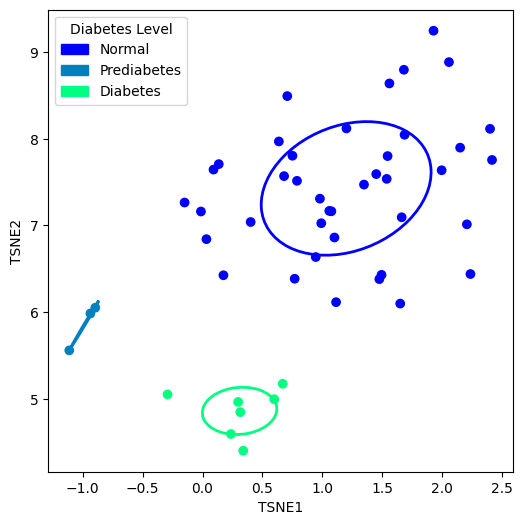

In [59]:
plt.figure(figsize=(6,6))
scatter = plt.scatter(gene_tsne[:,0],gene_tsne[:,1],c=df_classified_gene['A1C_Class'],cmap='winter')
unique_classes = df_classified_gene['A1C_Class'].unique()
colors = [scatter.cmap(scatter.norm(value)) for value in unique_classes]
legend_patches = [
    mpatches.Patch(color=colors[i], label="Normal" if unique_classes[i] == 0 else "Prediabetes" if unique_classes[i] == 1 else "Diabetes")
    for i in range(len(unique_classes))
]
ax = plt.gca()
for i, cls in enumerate(unique_classes):
    cluster_data = gene_tsne[df_classified_gene['A1C_Class'] == cls]
    plot_ellipse(ax, cluster_data, colors[i])

plt.legend(handles=legend_patches, title="Diabetes Level", loc="best")
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')

In [60]:
scaling = StandardScaler()

df_tsne_human_gene = scaling.fit_transform(df_human_gene.loc[top_100_classified_gene].T)
pd.DataFrame(df_tsne_human_gene)

tsne = TSNE(n_components=3, perplexity=30, n_iter=1000, random_state=42)
gene_tsne = tsne.fit_transform(df_tsne_human_gene)

gene_tsne_df = pd.DataFrame(gene_tsne, columns=['TSNE1', 'TSNE2', 'TSNE3'])

print(gene_tsne)

[[ 7.94763947e+01  3.51782608e+01 -1.23210556e+02]
 [-4.84567451e+00 -7.56393814e+01  9.85650539e+00]
 [-2.59820271e+01  4.76511459e+01 -1.34671310e+02]
 [ 4.53399086e+01  9.15571518e+01 -1.29368877e+00]
 [ 1.36642199e+01  4.39143906e+01  8.32892456e+01]
 [-1.04909382e+01 -1.36077057e+02  5.18065796e+01]
 [-8.04542999e+01 -9.54859924e+01 -2.01811409e+00]
 [-4.15987015e+01  9.43379364e+01 -7.28531723e+01]
 [-1.18119095e+02 -2.15221863e+01  6.99593811e+01]
 [ 9.97736206e+01  1.65690735e+02  1.99219074e+01]
 [-1.03704506e+02  2.75604382e+01 -8.83716431e+01]
 [ 9.43327103e+01 -6.37246284e+01 -2.82669621e+01]
 [ 4.06548920e+01 -1.32592453e+02 -7.87536545e+01]
 [-3.97756505e+00 -2.37307034e+01  5.89737282e+01]
 [ 9.81272507e+01 -9.29118805e+01  4.55457649e+01]
 [ 2.44333706e+01 -2.10690956e+01  1.40037842e+02]
 [-1.36909119e+02  2.43408451e+01  7.64314747e+00]
 [ 2.41195145e+01  6.81877899e+01 -9.45440903e+01]
 [ 4.10610886e+01  1.33136002e+02 -6.21062889e+01]
 [-6.16003952e+01  4.90606117e+

/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


/var/folders/j9/4hvlltj95999sl1bmvdvgv7c0000gn/T/ipykernel_45914/1918027993.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


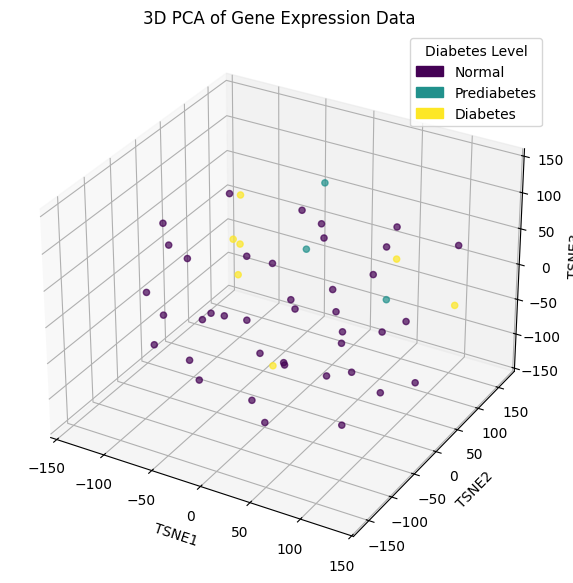

In [61]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(gene_tsne_df['TSNE1'], gene_tsne_df['TSNE2'], gene_tsne_df['TSNE3'], c=df_classified_gene['A1C_Class'], alpha=0.7)
unique_classes = df_classified_gene['A1C_Class'].unique()
colors = [scatter.cmap(scatter.norm(value)) for value in unique_classes]
legend_patches = [
    mpatches.Patch(color=colors[i], label="Normal" if unique_classes[i] == 0 else "Prediabetes" if unique_classes[i] == 1 else "Diabetes")
    for i in range(len(unique_classes))
]

ax.legend(handles=legend_patches, title="Diabetes Level", loc="best")
# Add labels and titles
ax.set_title('3D PCA of Gene Expression Data')
ax.set_xlabel('TSNE1')
ax.set_ylabel('TSNE2')
ax.set_zlabel('TSNE3')

fig.show()

### PCA (top 1000 genes)

In [62]:
scaling = StandardScaler()

df_tsne_human_gene = scaling.fit_transform(df_human_gene.loc[top_1000_classified_gene].T)
pd.DataFrame(df_tsne_human_gene)

tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
gene_tsne = tsne.fit_transform(df_tsne_human_gene)

print(gene_tsne)

[[ 0.51552904 -1.3677828 ]
 [ 2.2800267  -1.0930587 ]
 [ 1.3235964  -1.4062344 ]
 [ 0.94563067 -1.5904944 ]
 [ 0.36417508 -1.5964832 ]
 [ 1.7319725  -2.4146168 ]
 [ 1.1911393  -2.2751646 ]
 [ 0.7072826  -2.550018  ]
 [ 1.0170071  -0.5530688 ]
 [ 1.1065707  -1.9186295 ]
 [ 1.2072791  -0.10729102]
 [ 0.8542471  -2.3513055 ]
 [-0.74938405 -1.3225377 ]
 [ 0.29289868 -3.5925317 ]
 [ 0.95305055 -2.631959  ]
 [ 1.4490192  -3.1779435 ]
 [ 0.49235708 -0.6086985 ]
 [ 0.7116809  -0.91770625]
 [-0.4610987  -0.2134633 ]
 [ 1.8241402  -0.7065991 ]
 [ 0.5488674  -1.9519687 ]
 [ 0.06826375 -3.184189  ]
 [ 1.6697868  -1.1332415 ]
 [ 1.2460696  -0.8554441 ]
 [ 0.22997482 -1.5872506 ]
 [ 1.5885742  -0.7513027 ]
 [ 1.5282295  -2.6595604 ]
 [ 0.81146246 -1.9814918 ]
 [ 0.28617015 -1.6413924 ]
 [ 0.7551129  -1.1647164 ]
 [ 2.1184983   0.8642189 ]
 [ 0.56648046 -1.356817  ]
 [ 1.9184043  -1.5317521 ]
 [ 1.0653863  -1.1922928 ]
 [ 1.155757   -1.0861655 ]
 [ 2.0812173  -0.65141225]
 [-0.68608093 -0.2627473 ]
 

/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Text(0, 0.5, 'TSNE2')

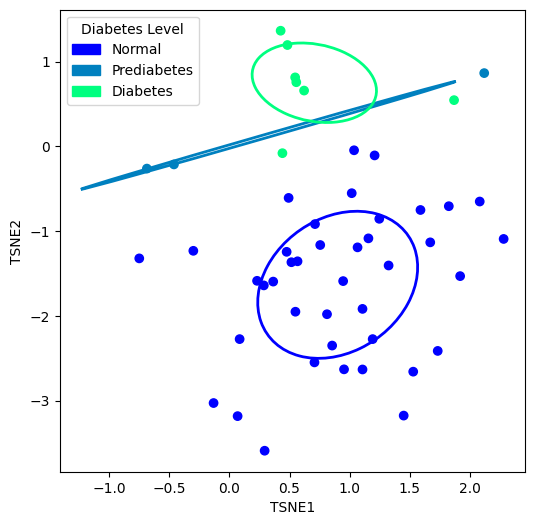

In [63]:
plt.figure(figsize=(6,6))
scatter = plt.scatter(gene_tsne[:,0],gene_tsne[:,1],c=df_classified_gene['A1C_Class'],cmap='winter')
unique_classes = df_classified_gene['A1C_Class'].unique()
colors = [scatter.cmap(scatter.norm(value)) for value in unique_classes]
legend_patches = [
    mpatches.Patch(color=colors[i], label="Normal" if unique_classes[i] == 0 else "Prediabetes" if unique_classes[i] == 1 else "Diabetes")
    for i in range(len(unique_classes))
]
ax = plt.gca()
for i, cls in enumerate(unique_classes):
    cluster_data = gene_tsne[df_classified_gene['A1C_Class'] == cls]
    plot_ellipse(ax, cluster_data, colors[i])


plt.legend(handles=legend_patches, title="Diabetes Level", loc="best")
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')

In [64]:
scaling = StandardScaler()

df_tsne_human_gene = scaling.fit_transform(df_human_gene.loc[top_1000_classified_gene].T)
pd.DataFrame(df_tsne_human_gene)

tsne = TSNE(n_components=3, perplexity=30, n_iter=1000, random_state=42)
gene_tsne = tsne.fit_transform(df_tsne_human_gene)

gene_tsne_df = pd.DataFrame(gene_tsne, columns=['TSNE1', 'TSNE2', 'TSNE3'])

print(gene_tsne)

[[-1.47878609e+01 -2.67935429e+01 -5.06371002e+01]
 [ 3.96613045e+01 -2.56808853e+00  1.63371201e+01]
 [ 2.69592285e+02 -3.49948944e+02  2.67288513e+02]
 [-3.68437805e+01  7.37722473e+01  9.30289001e+01]
 [-1.40787399e+02  1.13807793e+01 -2.34946766e+01]
 [-6.08714247e+00  7.60045471e+01 -1.22128304e+02]
 [-5.44173813e+01  1.16394814e+02 -5.77405393e-01]
 [ 8.21426678e+00 -1.12444706e+01 -1.14821556e+02]
 [-1.31040588e+02 -1.44291935e+01  4.97045670e+01]
 [ 3.56272964e+01  5.32394295e+01  8.18524017e+01]
 [-5.73868484e+01 -2.65896549e+01 -1.30080485e+00]
 [-1.22090935e+02  9.22927704e+01 -2.69122648e+00]
 [ 1.43381662e+01  8.74821949e+00  1.50135223e+02]
 [ 1.35877579e+02  3.93365746e+01 -7.89723969e+01]
 [-1.06080910e+02 -8.54660263e+01  1.05986244e+02]
 [-7.50448761e+01 -3.38019788e-01 -1.13955994e+02]
 [-6.74884262e+01  9.73057091e-01  1.19165901e+02]
 [-1.13846634e+02 -6.49620590e+01  7.49460077e+00]
 [-1.84633980e+01 -7.62778320e+01  1.17946663e+02]
 [-1.17203590e+02 -5.29721107e+

/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


/var/folders/j9/4hvlltj95999sl1bmvdvgv7c0000gn/T/ipykernel_45914/1918027993.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


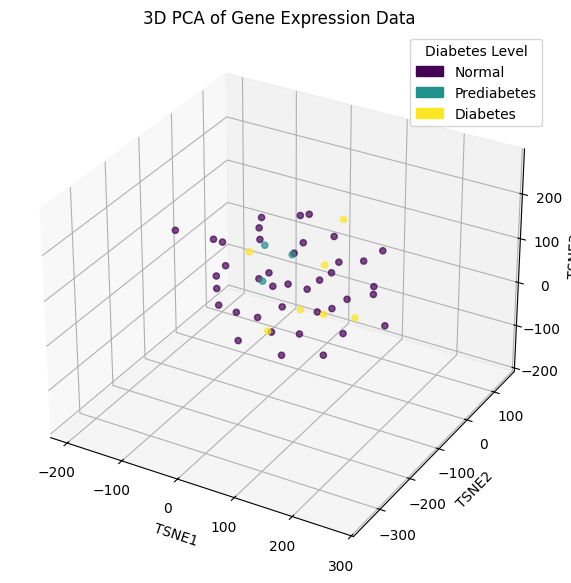

In [65]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(gene_tsne_df['TSNE1'], gene_tsne_df['TSNE2'], gene_tsne_df['TSNE3'], c=df_classified_gene['A1C_Class'], alpha=0.7)
unique_classes = df_classified_gene['A1C_Class'].unique()
colors = [scatter.cmap(scatter.norm(value)) for value in unique_classes]
legend_patches = [
    mpatches.Patch(color=colors[i], label="Normal" if unique_classes[i] == 0 else "Prediabetes" if unique_classes[i] == 1 else "Diabetes")
    for i in range(len(unique_classes))
]

ax.legend(handles=legend_patches, title="Diabetes Level", loc="best")
# Add labels and titles
ax.set_title('3D PCA of Gene Expression Data')
ax.set_xlabel('TSNE1')
ax.set_ylabel('TSNE2')
ax.set_zlabel('TSNE3')

fig.show()